Notebook for automation of unit cell finding
Chris Nelson, ORNL
2024


Standard Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
import os
import sys
from git import Repo,  InvalidGitRepositoryError

# General Settings

In [2]:
frameSz = np.array([128,64])

# Custom GIT Imports

In [3]:
gitlocal = ''
for i in sys.path:
    temp=i.split('\\')
    if temp[-1]=='site-packages':
        gitlocal=i

In [4]:
#Set local git repository location
gitremote = 'https://github.com/ctnelson/ctntools.git'
gitl = os.path.join(gitlocal,'ctntools')
print(gitl)

c:\programs\Anaconda3\envs\gpuenv\lib\site-packages\ctntools


In [5]:
#check for local repo, pull if found
#clone git repo if not found locally
if os.path.exists(gitl):
    try:
        my_repo = Repo(gitl)
        o = my_repo.remotes.origin
        o.pull()
    except InvalidGitRepositoryError:
        Repo.clone_from(gitremote, gitl)
        my_repo = Repo(gitl)
else:
    Repo.clone_from(gitremote, gitl)
    my_repo = Repo(gitl)
print(my_repo)

<git.repo.base.Repo 'c:\\programs\\Anaconda3\\envs\\gpuenv\\lib\\site-packages\\ctntools\\.git'>


In [6]:
#Import custom functions from git repo
from ctntools.Geometry.LineFuncs import NearestPointonLine, LineFromFractIntercepts
from ctntools.Geometry.pointInPolygon import imIndInPoly, pointInPoly

# NearestPointonLine

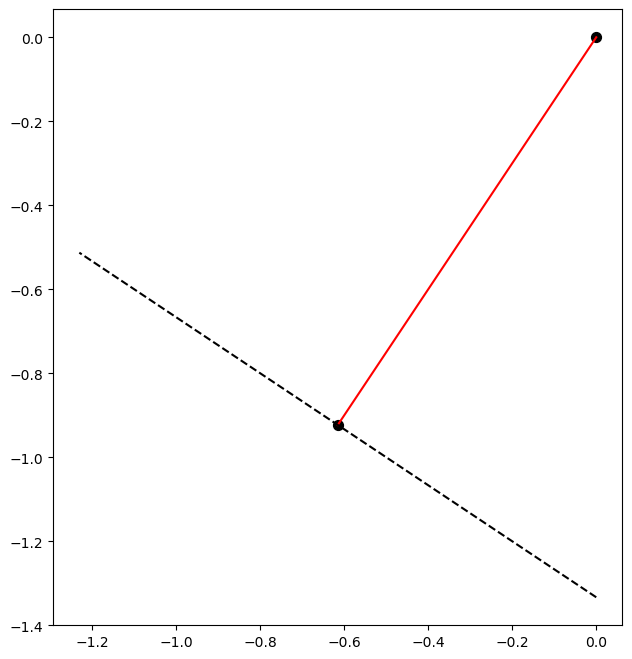

In [7]:
#1 line 1 point
a=2
b=3
c=4
xy0 = [0,0]

xy = NearestPointonLine(a,b,c,xy0).ravel()

xx = np.linspace(xy0[0],xy[0]*2,1000)
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
ax.plot([xy0[0],xy[0]],[xy0[1],xy[1]],'-r')
ax.plot(xx,(-a*xx-c)/b,'--k')
ax.scatter([xy0[0],xy[0]],[xy0[1],xy[1]],s=50,c='k')
ax.set_aspect(1)

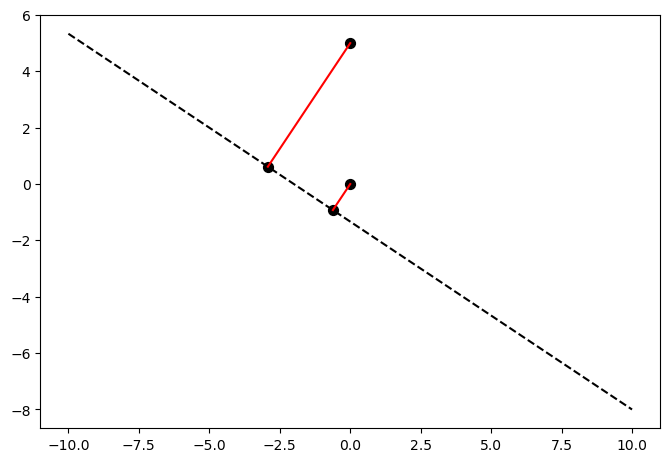

In [8]:
#1 line 2 points
a=2
b=3
c=4
xy0 = np.array([[0,0],[0,5]])

xy = NearestPointonLine(a,b,c,xy0)

xx = np.linspace(-10,10,1000)
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
ax.plot(xx,(-a*xx-c)/b,'--k')
for i in range(xy.shape[0]):
    ax.plot([xy0[i,0],xy[i,0]],[xy0[i,1],xy[i,1]],'-r')
    ax.scatter([xy0[i,0],xy[i,0]],[xy0[i,1],xy[i,1]],s=50,c='k')
ax.set_aspect(1)

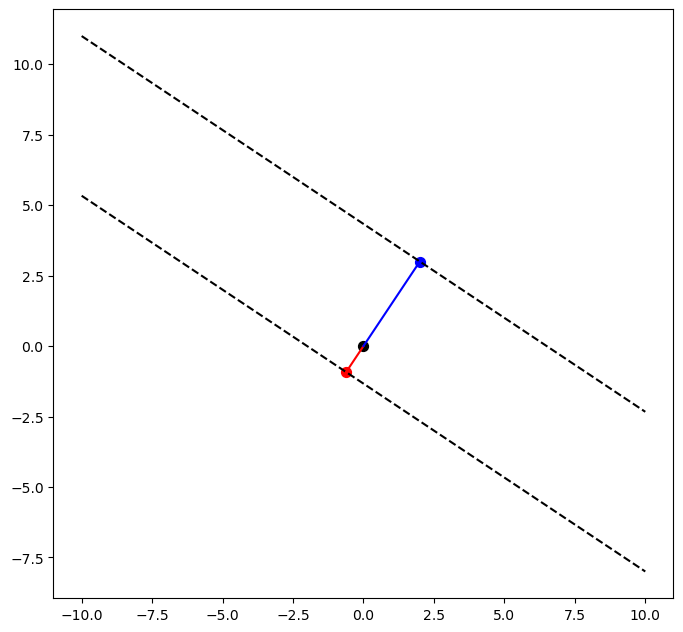

In [9]:
#2 lines 1 point
a=[2,2]
b=[3,3]
c=[4,-13]
xy0 = [0,0]

xy = NearestPointonLine(a,b,c,xy0)

xx = np.linspace(-10,10,1000)
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
ax.scatter(xy0[0],xy0[1],s=50,c='k')
#line1
i=0
ax.plot(xx,(-a[i]*xx-c[i])/b[i],'--k')
ax.plot([xy0[0],xy[i,0]],[xy0[1],xy[i,1]],'-r')
ax.scatter(xy[i,0],xy[i,1],s=50,c='r')
#line2
i=1
ax.plot(xx,(-a[i]*xx-c[i])/b[i],'--k')
ax.plot([xy0[0],xy[i,0]],[xy0[1],xy[i,1]],'-b')
ax.scatter(xy[i,0],xy[i,1],s=50,c='b')

ax.set_aspect(1)

# LineFromFractIntercepts

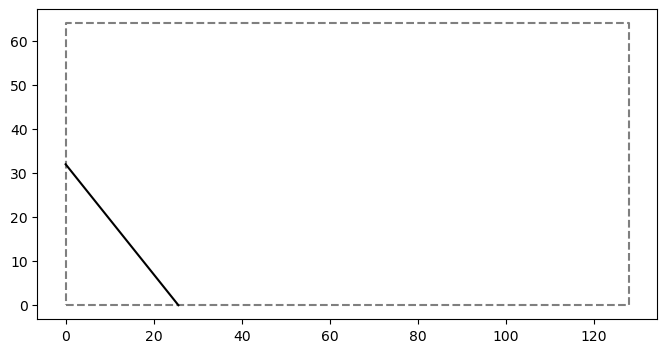

In [10]:
#1 line
fractInterc = np.array([5,2])
abc = LineFromFractIntercepts(frameSz,[fractInterc[0]],[fractInterc[1]])

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
xx = np.linspace(0,frameSz[0]/fractInterc[0],1000)
ax.plot(xx,(-abc[0,0]*xx-abc[0,2])/abc[0,1],'-k',zorder=1)
ax.plot([0,frameSz[0],frameSz[0],0,0],[0,0,frameSz[1],frameSz[1],0],'--k',alpha=.5,zorder=0)
ax.set_aspect(1)

C:\Users\ycn\AppData\Local\Temp\1\ipykernel_13020\1153601442.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(xx,m*xx+c,'-r',color=color[i],zorder=1)


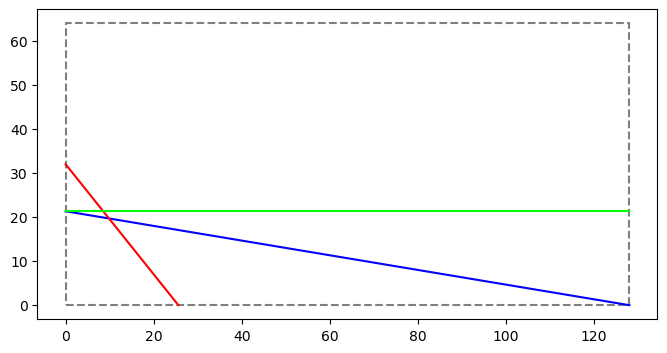

In [11]:
#Multi-lines
fractInterc = np.array([[1,3],[5,2],[0,3]])
abc = LineFromFractIntercepts(frameSz,fractInterc[:,0],fractInterc[:,1])

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)

color = plt.cm.brg(np.linspace(0, 1, abc.shape[0]))
for i in range(abc.shape[0]):
    if abc[i,1]==0:
        yy = np.linspace(0,frameSz[1],1000)
        m = -abc[i,1]/abc[i,0]
        c = -abc[i,2]/abc[i,0]
        ax.plot(m*xx+c,yy,'-r',color=color[i],zorder=1)
    else:
        if fractInterc[i,0]==0:
            xx = np.linspace(0,frameSz[0],1000)
        else:
            xx = np.linspace(0,frameSz[0]/fractInterc[i,0],1000)
        m = -abc[i,0]/abc[i,1]
        c = -abc[i,2]/abc[i,1]
        ax.plot(xx,m*xx+c,'-r',color=color[i],zorder=1)
ax.plot([0,frameSz[0],frameSz[0],0,0],[0,0,frameSz[1],frameSz[1],0],'--k',alpha=.5,zorder=0)

ax.set_aspect(1)

# FractInterc + NearestPointonLIne

C:\Users\ycn\AppData\Local\Temp\1\ipykernel_13020\3726026541.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  ax.plot(xx,m*xx+c,'-r',color=color[i],zorder=1)
C:\Users\ycn\AppData\Local\Temp\1\ipykernel_13020\3726026541.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax.plot([xy0[0],xy[i,0]],[xy0[1],xy[i,1]],'--k',color=color[i],alpha=.5,zorder=1)


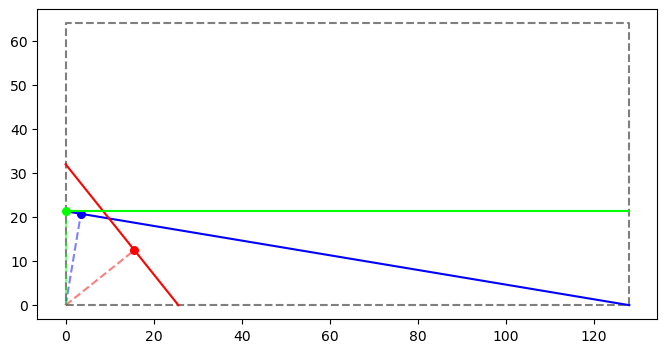

In [12]:
#Create Lines from Intercept Values
fractInterc = np.array([[1,3],[5,2],[0,3]])
xy0 = np.array([0,0])

abc = LineFromFractIntercepts(frameSz,fractInterc[:,0],fractInterc[:,1])
xy = NearestPointonLine(abc[:,0],abc[:,1],abc[:,2],xy0)

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
color = plt.cm.brg(np.linspace(0, 1, abc.shape[0]))
for i in range(abc.shape[0]):
    if abc[i,1]==0:
        yy = np.linspace(0,frameSz[1],1000)
        m = -abc[i,1]/abc[i,0]
        c = -abc[i,2]/abc[i,0]
        ax.plot(m*xx+c,yy,'-r',color=color[i],zorder=1)
    else:
        if fractInterc[i,0]==0:
            xx = np.linspace(0,frameSz[0],1000)
        else:
            xx = np.linspace(0,frameSz[0]/fractInterc[i,0],1000)
        m = -abc[i,0]/abc[i,1]
        c = -abc[i,2]/abc[i,1]
        ax.plot(xx,m*xx+c,'-r',color=color[i],zorder=1)
    ax.plot([xy0[0],xy[i,0]],[xy0[1],xy[i,1]],'--k',color=color[i],alpha=.5,zorder=1)
    ax.scatter(xy[i,0],xy[i,1],s=30,color=color[i],zorder=1)
ax.plot([0,frameSz[0],frameSz[0],0,0],[0,0,frameSz[1],frameSz[1],0],'--k',alpha=.5,zorder=0)

ax.set_aspect(1)

# Points in Polygon

Random Test Points & Polygons

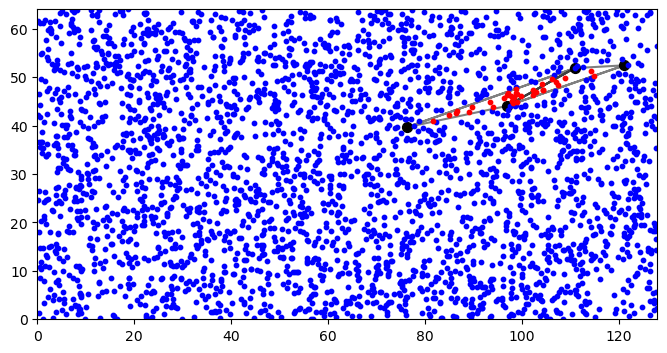

In [13]:
nTestPts = 3000
nVerts = 4
sz_=10
frameCntr = frameSz/2

testPts = np.random.rand(nTestPts,2) * np.repeat(frameSz[np.newaxis,:],nTestPts,axis=0)
polyVrts = np.repeat(frameCntr[np.newaxis,:],nVerts,axis=0) + np.random.rand(nVerts,2) * np.repeat(frameSz[np.newaxis,:]/2*.9,nVerts,axis=0)


inFlag, delTriSets = pointInPoly(testPts,polyVrts)

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
#Display Polygon
for i in range(delTriSets.shape[0]):
    ax.plot(np.append(polyVrts[delTriSets[i,:],0],polyVrts[delTriSets[i,:],0]), np.append(polyVrts[delTriSets[i,:],1],polyVrts[delTriSets[i,:],1]), '-k', zorder=1, alpha=.5)

ax.scatter(polyVrts[:,0], polyVrts[:,1], s=50, color='k', zorder=0)

#Display test points
ind = np.where(inFlag==0)[0]
ax.scatter(testPts[ind,0],testPts[ind,1],s=sz_,c='b')
ind = np.where(inFlag==1)[0]
ax.scatter(testPts[ind,0],testPts[ind,1],s=sz_,c='r')

ax.set_xlim([0,frameSz[0]])
ax.set_ylim([0,frameSz[1]])
ax.set_aspect(1)

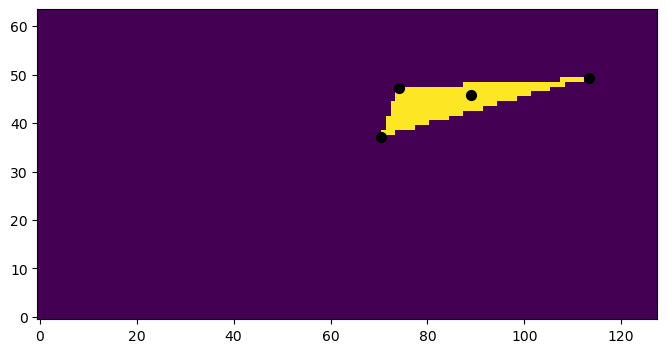

In [38]:
nVerts = 4
sz_=10
frameCntr = frameSz/2

polyVrts = np.repeat(frameCntr[np.newaxis,:],nVerts,axis=0) + np.random.rand(nVerts,2) * np.repeat(frameSz[np.newaxis,:]/2*.9,nVerts,axis=0)

inImFlag = np.zeros((frameSz[[1,0]]))
ind = imIndInPoly(frameSz[[1,0]],polyVrts)
inImFlag.ravel()[ind] = 1

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
#Display Polygon
ax.scatter(polyVrts[:,0], polyVrts[:,1], s=50, color='k', zorder=2)

#Display test points
ax.imshow(inImFlag,origin='lower',zorder=0)